# Lab 08 Prelab: Analytic chi-squared minimization

In [1]:
import data_entry
import matplotlib.pyplot as plt
import numpy as np

In Lab 08 you will continue to collect data from the RC circuit in an effort to improve your dataset. In addition, this prelab will provide you with an analytic formula for minimizing chi-squared. This formula allows you to calculate the best fitting parameters to your data automatically, instead of iteratively searching for the best fit parameters yourself.

However, a reminder that determining the best fit to your data does not allow you to say "this is a *good* fit to my data". The best fit, by definition, is one that minimizes chi-squared. But if your minimized chi-squared is $\chi^2=11.8$, we now know this is not a good fit to your data. Conversely, if your minimized chi-squared is $\chi^2=0.05$, then it may be a good fit to the data, but you should take a closer look at our uncertainty estimation strategy as our uncertainties are likely overestimated.

All of this is to say that just because the chi-squared minimization process can now be automated in the lab, this does not mean you can discard previous tools like residuals plots and the process of interpreting the minimized chi-squared. We have built up fitting to data in a piecemeal fashion for you, from uncertainty estimation, to weighted mean, to scatter plots and residuals, to chi-squared calculation, to iterative and now automated chi-squared minimization. This way, you now have a thorough understanding of what goes into each component of determining the best fit, as well as interpreting the goodness of fit in a systematic way.

## An analytic formula for minimizing chi-squared

Recall that chi-squared is a continuous function of the fitting parameters in your model. Specifically, if you have $P$ parameters in your model, then chi-squared is a $P$-dimensional function. For instance, if we are fitting a one-parameter linear model, $y=mx$, then $m$ is the sole parameter and the associated chi-squared function is $\chi^2(m)$. For a two-parameter linear model, $y=mx+b$, then we would have $\chi^2(m,b)$. 

From your first-year calculus course, you may know that we can take a continuous function $f(x)$ and find the minimum or maximum (a critical point, $x_c$) by taking the derivative of $f(x)$ with respect to $x$, setting this derivative equal to zero, and solving the resulting equation

$$\left[\frac{df(x)}{dx}\right]_{x=x_c}=0.$$

Since $\chi^2$ is a continuous function, we can do exactly this process to come up with an expression that automatically calculates the critical point(s), rather than iteratively adjusting the fitting parameter(s) to find the minimum. In other words, we can use calculus to derive an *analytic* expression for the best fit parameter(s).

*NOTE! for those thinking: wait a minute, how do we know the critical point will be a minimum and not a maximum? If we think about fitting a model to data that is finite, we know that as we move the parameters to $+\infty$ and $-\infty$ the fit will become increasingly worse to the data, meaning the residuals and thus chi-squared will continue to increase. This means that there is no maximum chi-squared, since we can always make the parameters worse by continuing to move them in the "wrong" direction, i.e., away from the best fit value. From this observation is follows that any critical point found must be a minimum.*

In the simplest case of a one-parameter linear model, $y=mx$, we wish to minimize chi-squared with respect to $m$ to find the best fit slope

$$ \frac{d\chi^2(m)}{dm} = 0.$$

We can first substitute our general expression for chi-squared

$$ \frac{d}{dm}\left[ \frac{1}{N-P} \sum_{i=1}^N \left(\frac{y_i - f(x_i)}{u[y_i]}\right)^2 \right] = 0.$$

Our model is $f(x_i) = mx_i$, which we can substitute into the above expression

$$ \frac{d}{dm}\left[ \frac{1}{N-P} \sum_{i=1}^N \left(\frac{y_i - mx_i}{u[y_i]}\right)^2 \right] = 0.$$

Since the derivative is with respect to $m$, it has no effect on $N$ or $P$, meaning we can move the derivative inside the brackets

$$ \frac{1}{N-P} \frac{d}{dm} \sum_{i=1}^N \left(\frac{y_i - mx_i}{u[y_i]}\right)^2 = 0.$$

The summation is only over variables with a subscript "$i$"; $m$ does not contain this so we can also switch the order of differentiation and summation

$$ \frac{1}{N-P} \sum_{i=1}^N \frac{d}{dm} \left(\frac{y_i - mx_i}{u[y_i]}\right)^2 = 0.$$

Now we perform some calculus and take the derivative (invoking the chain rule)

$$ \frac{2}{N-P} \sum_{i=1}^N  \left(\frac{y_i - mx_i}{u[y_i]}\right) \cdot \frac{d}{dm} \left(\frac{y_i - mx_i}{u[y_i]}\right)= 0$$

$$ \frac{2}{N-P} \sum_{i=1}^N  \left(\frac{y_i - mx_i}{u[y_i]}\right) \cdot -\frac{x_i}{u[y_i]} = 0.$$

The negative sign can be taken outside the sum, and since we are setting everything equal to zero the $2/(N-P)$ can be discarded

$$ \sum_{i=1}^N  \left(\frac{y_i - mx_i}{u[y_i]}\right) \cdot \frac{x_i}{u[y_i]} = 0.$$

What remains is to rearrange this expression for $m$. We can start by expanding the terms in the summation

$$ \sum_{i=1}^N  \left(\frac{y_i}{u[y_i]} - m\frac{x_i}{u[y_i]}\right) \cdot \frac{x_i}{u[y_i]} = 0$$
$$ \sum_{i=1}^N  \frac{x_iy_i}{(u[y_i])^2} - m\frac{x_i^2}{(u[y_i])^2} = 0$$

then finally isolate $m$

$$ m = \frac{\sum_{i=1}^N  \frac{x_iy_i}{(u[y_i])^2}}{\sum_{i=1}^N \frac{x_i^2}{(u[y_i])^2}} $$

So given our $x$ and $y$ data plus the uncertainty in $y$, we are able to analytically solve for the best fit slope using this equation! Since the data have some uncertainty, it seems reasonable that there should be some uncertainty in the best fit slope as well. This can be calculated by performing uncertainty propagation on the above expression. A derivation of this is beyond the scope of this prelab, so we provide the answer for you below:

$$ u[m] = \sqrt{\frac{1}{\sum_{i=1}^N \frac{x_i^2}{(u[y_i])^2}}} .$$

Since the term $\sum_{i=1}^N \frac{x_i^2}{(u[y_i])^2}$ appears both in $m$ and $u[m]$, it is convenient for notation and coding purposes to define a placeholder variable

$$ Z = \sum_{i=1}^N \frac{x_i^2}{(u[y_i])^2} $$

such that

$$ m = \frac{1}{Z} \sum_{i=1}^N  \frac{x_iy_i}{(u[y_i])^2} $$
$$ u[m] = \sqrt{\frac{1}{Z}} .$$


***Question:*** Take a close look at the expression for $u[m]$. In an experiment where you are trying to model the behaviour of a system as well as possible, an overarching goal is to make the relative uncertainty of your fitting parameters as small as possible. How do the number of data points, $N$, and uncertainty in the data, $u[y_i]$, affect relative uncertainty in $m$?

## Applying the analytic equation to sample data

The code below sets up these equations for $m$ and $u[m]$ for the sample data of last week's pre-lab. Run the cell below to see:

- the fits for the best fit slope $m$, the maximum reasonable slope ($m+u[m]$), and the minimum reasonable slope ($m-u[m]$), all plotted with the data; 
- the corresponding residuals plots; and 
- a visualization of how this analytically-determined $m$ lies at the lowest point of the chi-squared vs. $m$ curve (as expected for a minimum). 

Best fit slope m = 3.545 +/- 0.046
chi2 = 0.7594


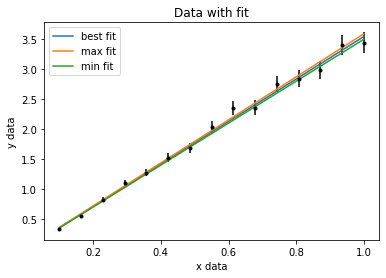

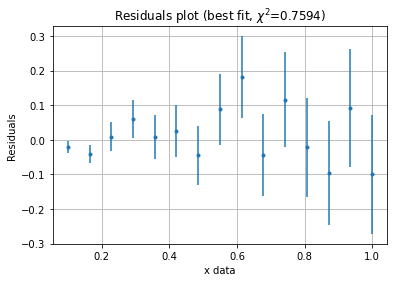

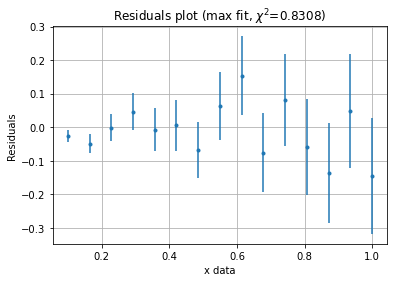

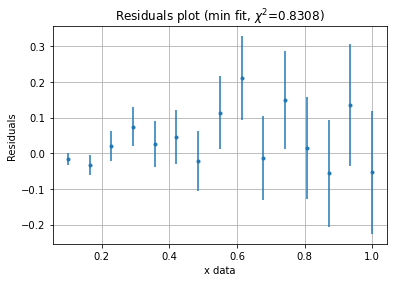

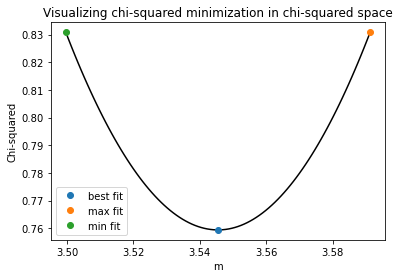

In [2]:
""" sample data """
xdata = np.array([0.1, 0.16428571, 0.22857143, 0.29285714, 0.35714286, 0.42142857, 0.48571429, 0.55, 0.61428571, 0.67857143, \
                   0.74285714, 0.80714286, 0.87142857, 0.93571429, 1.])
ydata = np.array([0.33336864, 0.5414786, 0.82003978, 1.09858314, 1.27560974, 1.52025082, 1.67681586, 2.03833678, \
                  2.35943739, 2.36120224, 2.74941308, 2.83963194, 2.9932707, 3.40978616, 3.44578725])
uydata = np.array([0.01666843, 0.02707393, 0.04100199, 0.05492916, 0.06378049, 0.07601254, 0.08384079, 0.10191684, \
                   0.11797187, 0.11806011, 0.13747065, 0.1419816, 0.14966353, 0.17048931, 0.17228936])

""" constructing model, calculating residuals and chi-squared """

x2uy2 = (xdata * xdata) / uydata**2 # calculating x_i*x_i/(u[y_i])^2 
xyuy2 = (xdata * ydata) / uydata**2 # calculating x_i*y_i/(u[y_i])^2 
Z = np.sum(x2uy2) # calculating placeholder variable, Z

m = np.sum(xyuy2) / Z # calculating best fit slope
um = np.sqrt(1/Z) # calculating uncertainty in best fit slope
print("Best fit slope m = {:.3f} +/- {:.3f}".format(m, um))

mMax = m + um # maximum reasonable slope
mMin = m - um # minimum reasonable slope

ymodelBest = m * xdata # best fit model
ymodelMax = mMax * xdata # max model
ymodelMin = mMin * xdata # min model

res = ydata - ymodelBest # calculating residuals (best fit)
wres2 = (res/uydata)**2 # weighted residuals squared
    
N = len(xdata) # number of data points
P = 1 # number of parameters
chi2 = np.sum(wres2) / (N - P) # calculating chi-squared
print("chi2 = {:.4f}".format(chi2))

""" plotting data and fits """

plt.errorbar(xdata, ydata, uydata, marker='.', linestyle='', color='k')
plt.plot(xdata, ymodelBest, label="best fit")
plt.plot(xdata, ymodelMax, label="max fit")
plt.plot(xdata, ymodelMin, label="min fit")
plt.xlabel('x data')
plt.ylabel('y data')
plt.title('Data with fit')
plt.legend()
plt.show()

""" plotting residuals (best fit) """

plt.errorbar(xdata, res, uydata, marker='.', linestyle='')
plt.xlabel('x data')
plt.ylabel('Residuals')
plt.title('Residuals plot (best fit, $\chi^2$={:.4f})'.format(chi2))
plt.grid()
plt.show()

""" plotting residuals (max  fit) """

resMax = ydata - ymodelMax # calculating residuals (max fit)
wres2Max = (resMax/uydata)**2 # weighted residuals squared
chi2Max = np.sum(wres2Max) / (N - P) # calculating chi-squared

plt.errorbar(xdata, resMax, uydata, marker='.', linestyle='')
plt.xlabel('x data')
plt.ylabel('Residuals')
plt.title('Residuals plot (max fit, $\chi^2$={:.4f})'.format(chi2Max))
plt.grid()
plt.show()

""" plotting residuals (min fit) """

resMin = ydata - ymodelMin # calculating residuals (min fit)
wres2Min = (resMin/uydata)**2 # weighted residuals squared
chi2Min = np.sum(wres2Min) / (N - P) # calculating chi-squared

plt.errorbar(xdata, resMin, uydata, marker='.', linestyle='')
plt.xlabel('x data')
plt.ylabel('Residuals')
plt.title('Residuals plot (min fit, $\chi^2$={:.4f})'.format(chi2Min))
plt.grid()
plt.show()


""" plotting chi-squared as a function of m """

mVec = np.linspace(mMin,mMax,100)
chi2Vec = np.zeros(np.size(mVec))
for i in range(len(mVec)):
    ymodelTemp = mVec[i]*xdata # model for the current value of m in the vector
    resTemp = ydata - ymodelTemp # residuals for this model
    wres2Temp = (resTemp / uydata)**2 # weighting these residuals
    chi2Vec[i] = np.sum(wres2Temp) / (N - P) # calculating chi2 from these weighted residuals

plt.plot(mVec, chi2Vec, 'k')
plt.plot(m, chi2, 'o', label='best fit')
plt.plot(mMax, chi2Max, 'o', label='max fit')
plt.plot(mMin, chi2Min, 'o', label='min fit')
plt.xlabel('m')
plt.ylabel('Chi-squared')
plt.title('Visualizing chi-squared minimization in chi-squared space')
plt.legend()
plt.show()

## Applying the analytic equation to your Lab 7 data

Once you are done, adapt this code in your notebook for Lab 8 to calculate the best fit $m$ for your $\tau$ vs. $R$ data. Compare this analytic best fit slope to your iteratively-determined slope from Lab 7.